In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from simarUtils import *
import torchvision

In [3]:
data = h5py.File('/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay_3dim.hdf5', 'r+')

In [7]:
for i in range(3):
    old_key = f"data/demo_{i}/actions"
    new_key = f"data/demo_{i}/actions_new"
    data[new_key] = data[old_key][:].reshape(-1, 10, 3)
    del data[old_key]
    data[old_key] = data[new_key][:]
    del data[new_key]

In [8]:
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1330, 10, 3)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1330, 3)
			ee_pose_full_unnorm: (1330, 7)
			front_img_1: (1330, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1360, 10, 3)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1360, 3)
			ee_pose_full_unnorm: (1360, 7)
			front_img_1: (1360, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_2: dict with k

In [10]:
data.close()

In [2]:
ds1 = "/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay_3dim.hdf5"
ds2 = "/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5"

ds3 = '/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3_prestacked.hdf5'
ds4 = '/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3.hdf5'

hdf5 = h5py.File(ds3, 'r+')
hdf52 = h5py.File(ds4, 'r')

In [4]:
hdf5["mask/train"][:], hdf5["mask/valid"][:]

(array([b'demo_15', b'demo_42', b'demo_67', b'demo_76', b'demo_41',
        b'demo_29', b'demo_21', b'demo_64', b'demo_48', b'demo_56',
        b'demo_24', b'demo_40', b'demo_51', b'demo_95', b'demo_100',
        b'demo_75', b'demo_9', b'demo_59', b'demo_69', b'demo_14',
        b'demo_49', b'demo_37', b'demo_43', b'demo_65', b'demo_28',
        b'demo_10', b'demo_63', b'demo_79', b'demo_91', b'demo_3',
        b'demo_58', b'demo_68', b'demo_88', b'demo_52', b'demo_73',
        b'demo_26', b'demo_80', b'demo_94', b'demo_57', b'demo_11',
        b'demo_96', b'demo_13', b'demo_6', b'demo_60', b'demo_25',
        b'demo_32', b'demo_90', b'demo_83', b'demo_61', b'demo_87',
        b'demo_62', b'demo_2', b'demo_93', b'demo_92', b'demo_33',
        b'demo_84', b'demo_22', b'demo_45', b'demo_30', b'demo_82',
        b'demo_23', b'demo_70', b'demo_81', b'demo_7', b'demo_99',
        b'demo_5', b'demo_89', b'demo_17', b'demo_1', b'demo_0',
        b'demo_27', b'demo_101', b'demo_18', b'demo_85'

In [5]:
hdf52["mask/train"][:], hdf52["mask/valid"][:]

(array([b'demo_15', b'demo_42', b'demo_67', b'demo_76', b'demo_41',
        b'demo_29', b'demo_21', b'demo_64', b'demo_48', b'demo_56',
        b'demo_24', b'demo_40', b'demo_51', b'demo_95', b'demo_100',
        b'demo_75', b'demo_9', b'demo_59', b'demo_69', b'demo_14',
        b'demo_49', b'demo_37', b'demo_43', b'demo_65', b'demo_28',
        b'demo_10', b'demo_63', b'demo_79', b'demo_91', b'demo_3',
        b'demo_58', b'demo_68', b'demo_88', b'demo_52', b'demo_73',
        b'demo_26', b'demo_80', b'demo_94', b'demo_57', b'demo_11',
        b'demo_96', b'demo_13', b'demo_6', b'demo_60', b'demo_25',
        b'demo_32', b'demo_90', b'demo_83', b'demo_61', b'demo_87',
        b'demo_62', b'demo_2', b'demo_93', b'demo_92', b'demo_33',
        b'demo_84', b'demo_22', b'demo_45', b'demo_30', b'demo_82',
        b'demo_23', b'demo_70', b'demo_81', b'demo_7', b'demo_99',
        b'demo_5', b'demo_89', b'demo_17', b'demo_1', b'demo_0',
        b'demo_27', b'demo_101', b'demo_18', b'demo_85'

In [5]:
# hdf5.create_dataset("mask/train_old", data=hdf5["mask/train"][:])
# hdf5.create_dataset("mask/valid_old", data=hdf5["mask/valid"][:])
# del hdf5["mask/train"]
# del hdf5["mask/valid"]
# hdf5.create_dataset("mask/train", data=hdf5["mask/train_aligned"][:])
# hdf5.create_dataset("mask/valid", data=hdf5["mask/valid_aligned"][:])
# del hdf5["mask/train_aligned"]
# del hdf5["mask/valid_aligned"]

In [3]:
# del data["mask"]
# data.create_group("mask")
# hdf5.create_dataset("mask/train_aligned", data=hdf52["mask/train"][:])
# hdf5.create_dataset("mask/valid_aligned", data=hdf52["mask/valid"][:])

<HDF5 dataset "valid_aligned": shape (21,), type "|S7">

In [5]:
hdf5["data/demo_2/actions"][200]

array([[0.20755489, 0.132333  , 0.57907362],
       [0.20745784, 0.13547598, 0.58250806],
       [0.20549802, 0.13242403, 0.58039723],
       [0.20574437, 0.13521836, 0.58130304],
       [0.20641422, 0.14365531, 0.58403272],
       [0.21080427, 0.15202508, 0.58890299],
       [0.20680753, 0.16184896, 0.58573989],
       [0.194573  , 0.16464086, 0.57624596],
       [0.19063408, 0.16674707, 0.57014377],
       [0.18834604, 0.17503529, 0.55837708]])

In [6]:
hdf52["data/demo_2/actions"][200]

array([0.20755489, 0.132333  , 0.57907362, 0.20745784, 0.13547598,
       0.58250806, 0.20549802, 0.13242403, 0.58039723, 0.20574437,
       0.13521836, 0.58130304, 0.20641422, 0.14365531, 0.58403272,
       0.21080427, 0.15202508, 0.58890299, 0.20680753, 0.16184896,
       0.58573989, 0.194573  , 0.16464086, 0.57624596, 0.19063408,
       0.16674707, 0.57014377, 0.18834604, 0.17503529, 0.55837708])

In [10]:
sorted(list(hdf5["mask/valid_aligned"][:]))

[b'demo_16',
 b'demo_19',
 b'demo_20',
 b'demo_31',
 b'demo_35',
 b'demo_36',
 b'demo_38',
 b'demo_39',
 b'demo_4',
 b'demo_44',
 b'demo_53',
 b'demo_54',
 b'demo_55',
 b'demo_66',
 b'demo_71',
 b'demo_72',
 b'demo_74',
 b'demo_77',
 b'demo_78',
 b'demo_8',
 b'demo_97']

In [11]:
sorted(list(hdf52["mask/valid"][:]))

[b'demo_16',
 b'demo_19',
 b'demo_20',
 b'demo_31',
 b'demo_35',
 b'demo_36',
 b'demo_38',
 b'demo_39',
 b'demo_4',
 b'demo_44',
 b'demo_53',
 b'demo_54',
 b'demo_55',
 b'demo_66',
 b'demo_71',
 b'demo_72',
 b'demo_74',
 b'demo_77',
 b'demo_78',
 b'demo_8',
 b'demo_97']

## Custom Hand Data

In [6]:
# data = h5py.File("/coc/flash7/datasets/egoplay/one_bowl_one_object/plushiesMimicplay_hand_yellow_black_table_with_type_label_masked.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/hand_data_robo_cam_jun3/rawjpgsv3/demo0.h5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5", "r+")
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_CUSTOM_HAND/oboo_custom_hand/plushiesMimicplay_hand_yellow_black_table_with_type_label_copy.hdf5", "r")
data = h5py.File("/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5", "r")

data["data"]["demo_0"]["label"][:]
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1330, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1330, 3)
			ee_pose_full_unnorm: (1330, 7)
			front_img_1: (1330, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1360, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1360, 3)
			ee_pose_full_unnorm: (1360, 7)
			front_img_1: (1360, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_2: dict with keys:  

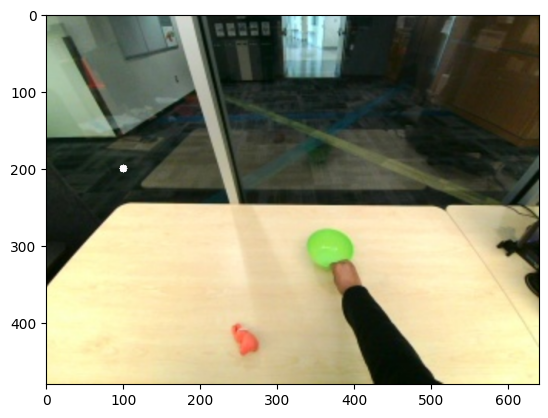

In [48]:
T = 500
demo = 1
px = cam_frame_to_cam_pixels(data[f"data/demo_{demo}/obs/ee_pose"][T:T+25], WIDE_LENS_HAND_LEFT_K)
img = data[f"data/demo_{demo}/obs/front_img_1"][T].astype(np.uint8)
# img = draw_dot_on_frame(img, px, show=False)
img = draw_dot_on_frame(img, [[100, 200]], show=False)
plt.imshow(img)

In [7]:
data[f"data/demo_{demo}/obs/ee_pose"][T:T+25]

array([[ 0.02630188,  0.17203204,  0.38120468],
       [ 0.01759659,  0.17857598,  0.39323028],
       [ 0.00893579,  0.18188313,  0.39724159],
       [ 0.00442394,  0.16950023,  0.36726685],
       [-0.00334481,  0.18462677,  0.39312593],
       [-0.00671183,  0.19432791,  0.40200768],
       [-0.00892572,  0.19585439,  0.40013392],
       [-0.00943695,  0.17999883,  0.36898439],
       [-0.01432563,  0.1928922 ,  0.38768538],
       [-0.01121626,  0.18741794,  0.36373554],
       [-0.01249298,  0.20232025,  0.37576049],
       [-0.01410295,  0.20638105,  0.36531144],
       [-0.01120143,  0.21101651,  0.35184097],
       [-0.01357881,  0.23617687,  0.37470629],
       [-0.01051078,  0.23796767,  0.36343928],
       [-0.01020151,  0.2509046 ,  0.3762894 ],
       [-0.00759424,  0.24683452,  0.36667148],
       [-0.00528307,  0.23853144,  0.35587999],
       [-0.00578794,  0.24811577,  0.36529154],
       [-0.00504264,  0.24374558,  0.35482407],
       [-0.00680742,  0.24394667,  0.348

## Aria Hand Data

In [14]:
# data = h5py.File("/coc/flash7/datasets/egoplay/robot_wearing_aria_may23/robot_wearing_aria_may23.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_yellow_table_aria_final_ACT.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/oboo_diverse_aria_may9/converted/oboo_aria_diverse_Mimicplay.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_yellow_table_aria_final_ACT.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3.hdf5", "r")
data = h5py.File(ds2, "r")

nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1330, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1330, 3)
			ee_pose_full_unnorm: (1330, 7)
			front_img_1: (1330, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1360, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1360, 3)
			ee_pose_full_unnorm: (1360, 7)
			front_img_1: (1360, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_2: dict with keys:  

ee_pose:  [[0.12 0.26 0.29]]
actions:  [ 0.14  0.24  0.34  0.16  0.23  0.37  0.16  0.23  0.37  0.16  0.24  0.38
  0.14  0.23  0.39  0.1   0.19  0.38  0.05  0.17  0.38  0.01  0.18  0.4
 -0.01  0.2   0.4  -0.01  0.2   0.38]
[[433.4787149  430.26411244   1.        ]
 [437.99778999 406.69775462   1.        ]
 [437.67592235 407.14188146   1.        ]
 [433.36546973 409.4116598    1.        ]
 [422.69807419 400.47802265   1.        ]
 [394.43705292 379.23788321   1.        ]
 [358.84052586 365.85365545   1.        ]
 [330.56315523 365.9748515    1.        ]
 [318.6533315  374.37891804   1.        ]
 [315.74499168 387.39620434   1.        ]]


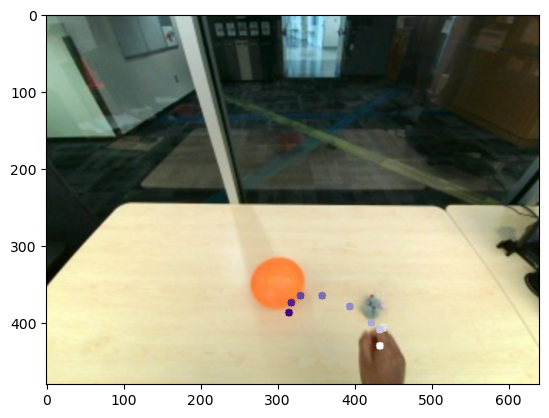

In [15]:
T = 0
demo = "demo_0"
# px = cam_frame_to_cam_pixels(data[f"data/{demo}/actions"][T].reshape((10, 3)), WIDE_LENS_HAND_LEFT_K)
px = cam_frame_to_cam_pixels(data[f"data/{demo}/actions"][T].reshape((-1, 3)), WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)
print("ee_pose: ", data[f"data/{demo}/obs/ee_pose"][[T]].round(2))
print("actions: ", data[f"data/{demo}/actions"][T].round(2))
print(px)

In [5]:
def make_video(data, demo):
    frames = torch.zeros(data[f"data/{demo}/obs/front_img_1"][:].shape)
    for i in range(len(data[f"data/{demo}/obs/front_img_1"])):
        img = data[f"data/{demo}/obs/front_img_1"][i]
        px = cam_frame_to_cam_pixels(data[f"data/{demo}/actions"][i].reshape((-1, 3)), WIDE_LENS_HAND_LEFT_K)
        img = draw_dot_on_frame(img, px, show=False)
        frames[i] = torch.tensor(img)
    
    torchvision.io.write_video(f"aria_data_LH3/{demo}.mp4", frames, fps=30)

for i in range(20, 30):
    print(i)
    make_video(data, f"demo_{i}")

20


21
22
23
24
25
26
27
28
29


torch.Size([1, 480, 640, 3])
torch.Size([1, 3, 480, 640])


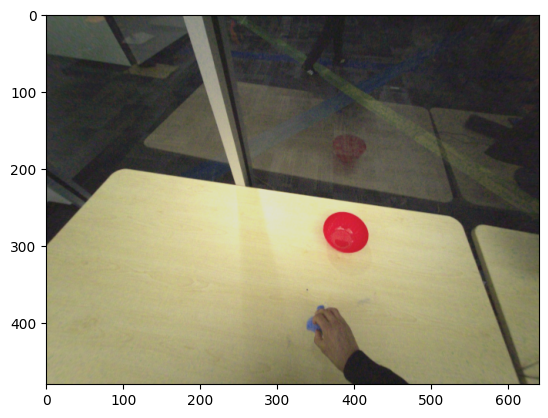

In [97]:
# im = (data["observations/images/cam_high"][1000]/1.5).astype(np.uint8)
# im = warm_image(im, intensity=2)
im = data["data/demo_100/obs/front_img_1"][298:299]
im = torch.from_numpy(im)/255
print(im.shape)
im = im.permute(0, 3, 1, 2)

im = TVTF.adjust_hue(im, 0.05)
im = TVTF.adjust_saturation(im, 0.9)
im = TVTF.adjust_brightness(im, 1.4)
im = TVTF.adjust_contrast(im, 0.8)
# im = TVTF.adjust_gamma(im, 0.6)
# im = TVTF.adjust_sharpness(im, 1.5)
# im = apply_vignette(im, exponent=1)
print(im.shape)
plt.imshow(im.permute(0, 2, 3, 1)[0])

In [22]:
data[f"data/{demo}/actions"][T].reshape((10, 3))

array([[0.10871642, 0.22300795, 0.52196443],
       [0.10965449, 0.22471997, 0.52283633],
       [0.11032257, 0.22452173, 0.52170841],
       [0.11055389, 0.22542613, 0.52130161],
       [0.11057597, 0.22597415, 0.52226784],
       [0.10958038, 0.22668   , 0.52318066],
       [0.10975273, 0.22708398, 0.52396931],
       [0.10975615, 0.22660878, 0.52396805],
       [0.11077337, 0.22631841, 0.5234197 ],
       [0.1113659 , 0.22619658, 0.52258972]])

## Robot Data

In [3]:
# data = h5py.File("/coc/flash7/datasets/egoplay/robot_wearing_aria_robot_view_may23/robot_wearing_aria_robot_view.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/robot_wearing_aria_oboo_may23/RobotWearingAria/aria_RobotWearingAriaMimicplay.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/hand_data_robo_cam_may_20/hand_data_robo_cam_may_20.hdf5", "r")
data = h5py.File("/coc/flash7/datasets/egoplay/one_bowl_one_object_robot_apr9/robomimic/oboo_apr9Mimicplay.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

ee_pose:  [[-0.14  0.37  0.66]]
actions:  [[-0.14  0.36  0.65]
 [-0.12  0.28  0.65]
 [-0.07  0.22  0.65]
 [-0.02  0.17  0.66]
 [ 0.01  0.16  0.67]
 [ 0.04  0.15  0.68]
 [ 0.08  0.14  0.7 ]
 [ 0.11  0.12  0.72]
 [ 0.11  0.12  0.76]
 [ 0.12  0.13  0.79]]


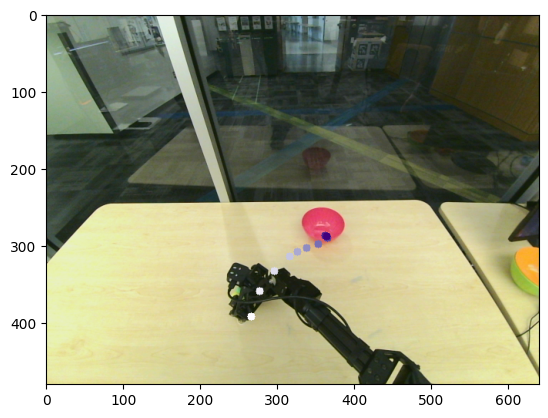

In [5]:
T = 200
demo = "demo_0"
px = cam_frame_to_cam_pixels(data[f"data/{demo}/actions"][T].reshape((10, 3)), WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)
print("ee_pose: ", data[f"data/{demo}/obs/ee_pose"][[T]].round(2))
print("actions: ", data[f"data/{demo}/actions"][T].reshape((10, 3)).round(2))

## Aloha Data

In [8]:
data = h5py.File("/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1330, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1330, 3)
			ee_pose_full_unnorm: (1330, 7)
			front_img_1: (1330, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1360, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1360, 3)
			ee_pose_full_unnorm: (1360, 7)
			front_img_1: (1360, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_2: dict with keys:  

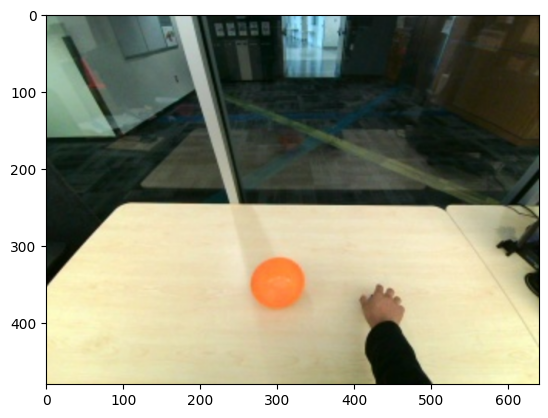

In [10]:
plt.imshow(data["data/demo_0/obs/front_img_1"][10].astype(np.uint8))

In [2]:
import torchvision.transforms.v2.functional as TVTF

torch.Size([50, 480, 640, 3])
torch.Size([50, 3, 480, 640])


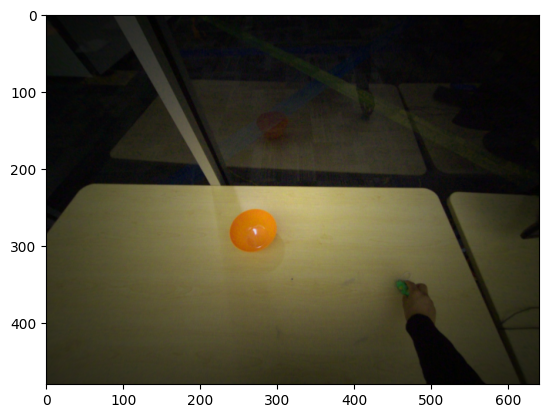

In [96]:
# im = (data["observations/images/cam_high"][1000]/1.5).astype(np.uint8)
# im = warm_image(im, intensity=2)
im = data["data/demo_0/obs/front_img_1"][10:60].astype(np.uint8)
im = torch.from_numpy(im)/255
print(im.shape)
im = im.permute(0, 3, 1, 2)
# im = TVTF.adjust_brightness(im, 0.8)
im = TVTF.adjust_hue(im, -0.05)
im = TVTF.adjust_saturation(im, 1.2)
im = apply_vignette(im, exponent=1)
print(im.shape)
plt.imshow(im.permute(0, 2, 3, 1)[43])

In [15]:
# def create_vignette_mask(height, width, exponent=2):
#     """
#     Create a vignette mask with the given height and width.
#     The exponent controls the strength of the vignette effect.
#     """
#     y, x = torch.meshgrid(torch.linspace(-1, 1, height), torch.linspace(-1, 1, width), indexing='ij')
#     radius = torch.sqrt(x**2 + y**2)/2
#     mask = 1 - torch.pow(radius, exponent)
#     mask = torch.clamp(mask, 0, 1)
#     return mask

# def apply_vignette(image_tensor, exponent=2):
#     """
#     Apply a vignette effect to a given image tensor.
#     """
#     _, height, width = image_tensor.shape
#     vignette_mask = create_vignette_mask(height, width, exponent)
#     vignette_mask = vignette_mask.unsqueeze(0)  # Add channel dimension
#     vignette_mask = vignette_mask.expand_as(image_tensor)  # Expand to match image channels
#     return image_tensor * vignette_mask

def create_vignette_mask(height, width, exponent=2):
    """
    Create a vignette mask with the given height and width.
    The exponent controls the strength of the vignette effect.
    """
    y, x = torch.meshgrid(torch.linspace(-1, 1, height), torch.linspace(-1, 1, width), indexing='ij')
    radius = torch.sqrt(x**2 + y**2)/2
    mask = 1 - torch.pow(radius, exponent)
    mask = torch.clamp(mask, 0, 1)
    return mask

def apply_vignette(image_tensor, exponent=2):
    """
    Apply a vignette effect to a batch of image tensors.
    """
    N, C, H, W = image_tensor.shape
    vignette_mask = create_vignette_mask(H, W, exponent)
    vignette_mask = vignette_mask.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    vignette_mask = vignette_mask.expand(N, C, H, W)  # Expand to match the batch of images
    vignette_mask = vignette_mask.to(image_tensor.device)
    return image_tensor * vignette_mask

In [18]:
def warm_image(image: np.ndarray, intensity: float = 1.0) -> np.ndarray:
    """
    Warm an image by increasing red and green channels.

    Parameters:
    image (np.ndarray): Input image of shape (H, W, 3) with values in the range [0, 255].
    intensity (float): Factor by which to increase the warmth. 
                       Values > 1.0 will increase the warmth, and values < 1.0 will decrease it.

    Returns:
    np.ndarray: Warmed image of the same shape as the input.
    """
    if intensity < 0:
        raise ValueError("Intensity must be a non-negative value")

    # Convert image to float32 to prevent overflow issues
    image = image.astype(np.float32)

    # Create a warming filter
    warm_filter = np.array([1.0 + 0.1 * intensity, 1.0, 1.0 - 0.1 * intensity])

    # Apply the warming filter to the image
    warmed_image = image * warm_filter

    # Clip values to the valid range [0, 255] and convert back to uint8
    warmed_image = np.clip(warmed_image, 0, 255).astype(np.uint8)

    return warmed_image


torch.FloatTensor


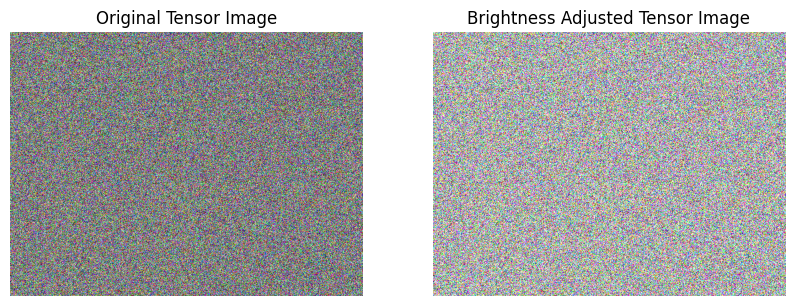

In [40]:
import torch
import torchvision.transforms.v2.functional as F
import matplotlib.pyplot as plt

# Example tensor with random values (3 channels, height 256, width 256)
tensor_image = torch.rand(3, 480, 640)
print(tensor_image.type())

# Adjust the brightness
brightness_factor = 1.5  # Increase brightness by 50%
adjusted_tensor_image = F.adjust_brightness(tensor_image, brightness_factor)

# Function to display tensor images
def show_tensor_image(tensor):
    # Convert the tensor to (H, W, C) format and scale to [0, 1]
    img = tensor.permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.axis('off')

# Display the original and adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Tensor Image')
show_tensor_image(tensor_image)

plt.subplot(1, 2, 2)
plt.title('Brightness Adjusted Tensor Image')
show_tensor_image(adjusted_tensor_image)

plt.show()
